In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from HighResQHD import HighResQHD

from numpy import sin, cos, sqrt, pi, exp

In [ ]:
# # Styblinski-Tang function

# c = 2e-3

# def f(X,Y):
#     return c * ((10*X-5)**4 - 16 * (10*X-5)**2 + 5 * (10*X-5)) + \
#             c * ((10*Y-5)**4 - 16 * (10*Y-5)**2 + 5 * (10*Y-5))

# def df_dx(X,Y):
#     return 10*c * (4 * (10*X-5)**3 - 32*(10*X-5) + 5)

# def df_dy(X,Y):
#     return 10*c * (4 * (10*Y-5)**3 - 32*(10*Y-5) + 5)

# grad = [df_dx, df_dy]

# # f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
# # grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)

# lb = 0
# rb = 1
# s = lambda t: 100
# beta = lambda t: 5e-3 * np.sqrt(s(t))
# N = 32
# T = 10

# model = HighResQHD(f, grad, lb, rb, s, beta, N)
# fmin = model.get_fmin()

# snapshot_times_0, obj_val_0 = model.qhd_simulator(T, 50000, 100)
# snapshot_times_1, obj_val_1 = model.high_res_qhd_simulator(T, 50000, 100)
# snapshot_times_2, obj_val_2 = model.gd_samples(1000, 1000, 1e-2) 
# snapshot_times_3, obj_val_3 = model.nesterov_samples(1000, 1000, 1e-2) 
# snapshot_times_4, obj_val_4 = model.sgd_samples(1000, 1000, 1e-2) 


# y_data_0 = obj_val_0 - fmin
# y_data_1 = obj_val_1 - fmin
# y_data_2 = obj_val_2 - fmin
# y_data_3 = obj_val_3 - fmin
# y_data_4 = obj_val_4 - fmin

# plt.plot(snapshot_times_0, y_data_0, label='QHD')
# plt.plot(snapshot_times_1, y_data_1, label='High-Res QHD')
# plt.plot(snapshot_times_2, y_data_2, label='GD')
# plt.plot(snapshot_times_3, y_data_3, label='NAGD')
# plt.plot(snapshot_times_4, y_data_4, label='SGD')

# plt.yscale('log')
# plt.legend()
# plt.title("Styblinski-Tang function")

## A Quadruple Function

In [52]:
# Quadruple well

lb = -2
rb = 2
N = 128
success_gap = 1
s = lambda t: 10
beta = lambda t: 0.01 * np.sqrt(s(t))

def f(X,Y):
    return cos(pi*X)**2 + 0.25 * X**4 + cos(pi*Y)**2 + 0.25 * Y**4

def du_dx(X,Y):
    return -2 * pi * cos(pi*X) * sin(pi*X) + X**3

def du_dy(X,Y):
    return -2 * pi * cos(pi*Y) * sin(pi*Y) + Y**3

grad = [du_dx, du_dy]

f_min = 0.03125


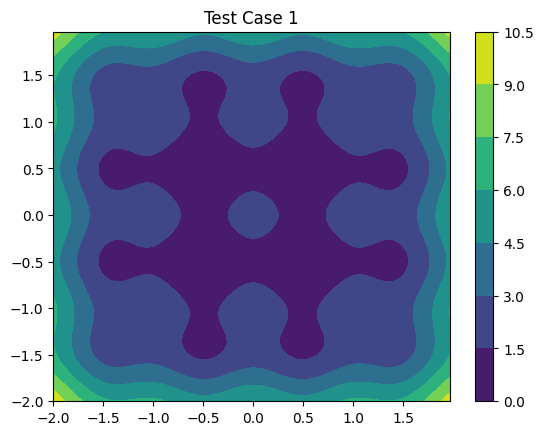

In [ ]:
model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
T = 10
print(f'f_min = {fmin}')
# plt.imshow(model.V < success_gap)

plt.contourf(model.X, model.Y, model.V)
plt.colorbar()
plt.title('Test Case 1')
# plt.savefig('test_case_1.png', dpi=300)

In [28]:
snapshot_times_0, obj_val_0, success_prob_0  = model.qhd_simulator(T, 50000, 100)
snapshot_times_1, obj_val_1, success_prob_1 = model.high_res_qhd_simulator(T, 50000, 100)
snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 1000, 1e-2) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 1000, 1e-2) 
snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_samples(1000, 1000, 1e-2)

f_min = 0.03125


Text(0.5, 0, 't')

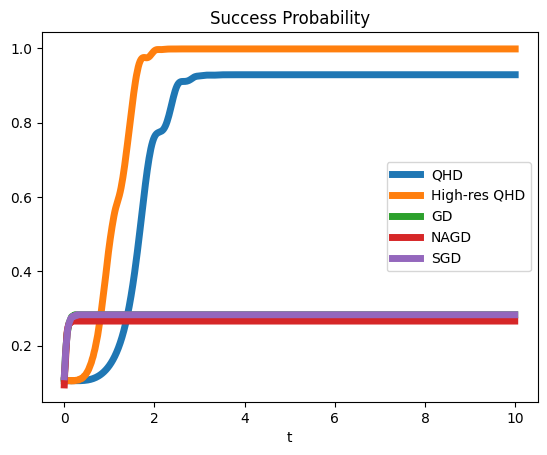

In [33]:
plt.plot(snapshot_times_0, success_prob_0, label='QHD', linewidth=5)
plt.plot(snapshot_times_1, success_prob_1, label='High-res QHD', linewidth=5)
plt.plot(snapshot_times_2, success_prob_2, label='GD', linewidth=5)
plt.plot(snapshot_times_3, success_prob_3, label='NAGD', linewidth=5)
plt.plot(snapshot_times_4, success_prob_4, label='SGD', linewidth=5)
plt.legend()
plt.title('Success Probability')
plt.xlabel('t')

# plt.savefig('hard_success_prob.png', dpi=300)

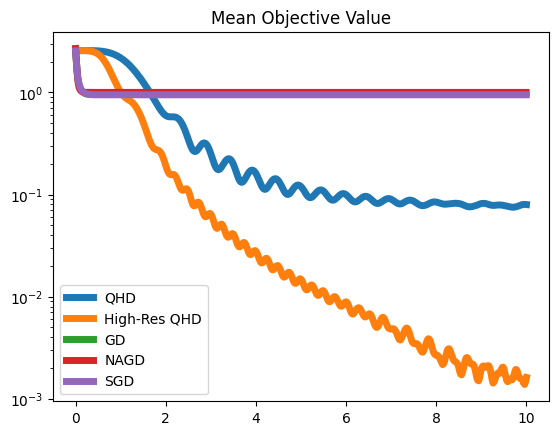

In [31]:
y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
y_data_4 = obj_val_4 - fmin

plt.plot(snapshot_times_0, y_data_0, label='QHD', linewidth=5)
plt.plot(snapshot_times_1, y_data_1, label='High-Res QHD', linewidth=5)
plt.plot(snapshot_times_2, y_data_2, label='GD', linewidth=5)
plt.plot(snapshot_times_3, y_data_3, label='NAGD', linewidth=5)
plt.plot(snapshot_times_4, y_data_4, label='SGD', linewidth=5)

plt.yscale('log')
plt.legend()
plt.title("Mean Objective Value")

# plt.savefig('hard_mean_obj.png', dpi=300)

## Rastrigin Function

In [55]:
# Rastrigin function
lb = -3
rb = 3
N = 128
success_gap = 1
s = lambda t: 10
beta = lambda t: 0.01 * np.sqrt(s(t))

def f(X,Y):
    return X**2 - 10 * cos(2*pi*X) + Y**2 - 10 * cos(2*pi*Y) + 20
def du_dx(X,Y):
    return 2*X + 20*pi*sin(2*pi*X)

def du_dy(X,Y):
    return 2*Y + 20*pi*sin(2*pi*Y)

grad = [du_dx, du_dy]

f_min = 0.0


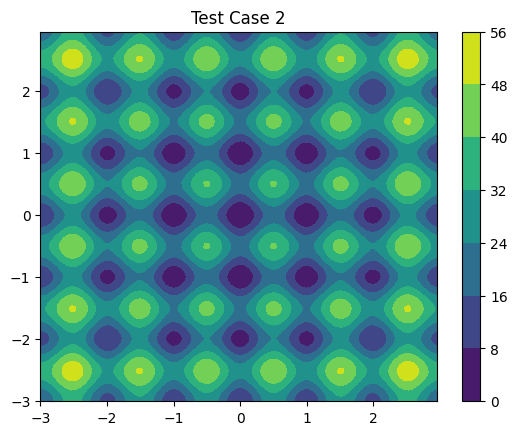

In [ ]:
model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
print(f'f_min = {fmin}')

plt.contourf(model.X, model.Y, model.V)
plt.colorbar()
plt.title('Test Case 2')
# plt.savefig('test_case_2.png', dpi=300)

In [44]:
T = 5
snapshot_times_0, obj_val_0, success_prob_0 = model.qhd_simulator(T, 50000, 100)
snapshot_times_1, obj_val_1, success_prob_1 = model.high_res_qhd_simulator(T, 50000, 100)
snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 1000, 5e-3) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 1000, 5e-3) 
snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_samples(1000, 1000, 5e-3)

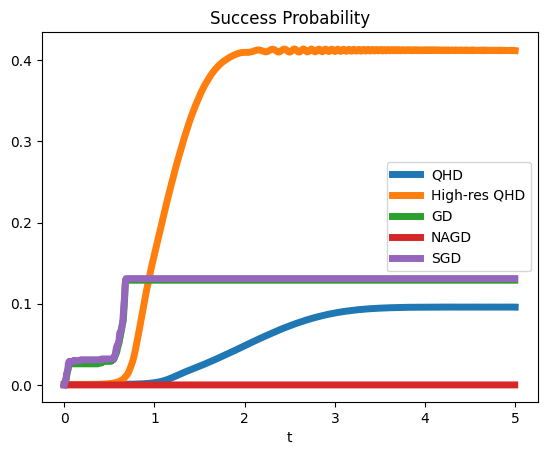

In [48]:
plt.plot(snapshot_times_0, success_prob_0, label='QHD', linewidth=5)
plt.plot(snapshot_times_1, success_prob_1, label='High-res QHD', linewidth=5)
plt.plot(snapshot_times_2, success_prob_2, label='GD', linewidth=5)
plt.plot(snapshot_times_3, success_prob_3, label='NAGD', linewidth=5)
plt.plot(snapshot_times_4, success_prob_4, label='SGD', linewidth=5)
plt.legend()
plt.title('Success Probability')
plt.xlabel('t')

# plt.savefig('rastrigin_success_prob.png', dpi=300)

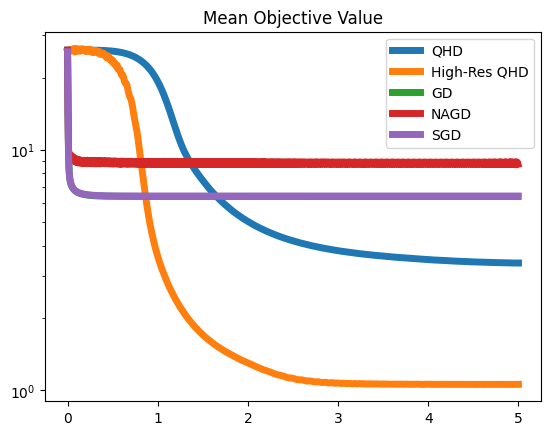

In [47]:
y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
y_data_4 = obj_val_4 - fmin

plt.plot(snapshot_times_0, y_data_0, label='QHD', linewidth=5)
plt.plot(snapshot_times_1, y_data_1, label='High-Res QHD', linewidth=5)
plt.plot(snapshot_times_2, y_data_2, label='GD', linewidth=5)
plt.plot(snapshot_times_3, y_data_3, label='NAGD', linewidth=5)
plt.plot(snapshot_times_4, y_data_4, label='SGD', linewidth=5)

plt.yscale('log')
plt.legend()
plt.title("Mean Objective Value")

# plt.savefig('rastrigin_mean_obj.png', dpi=300)

In [49]:
print(y_data_0[-1])
print(y_data_1[-1])

3.387374655989679
1.060313599561643
